In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

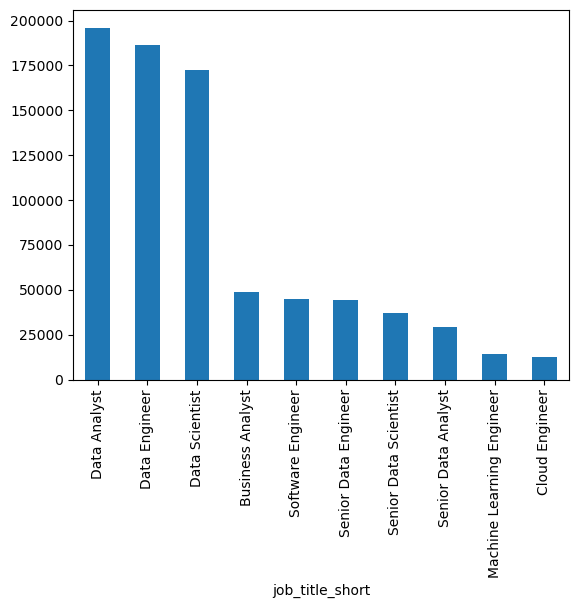

In [ ]:
fig, ax = plt.subplots()   #figure is the entire thing, axis is the individual plots
# fig and ax are the std nomenclatures for the 2 objects in the subplot
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [8]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [9]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

<Axes: xlabel='job_schedule_type'>

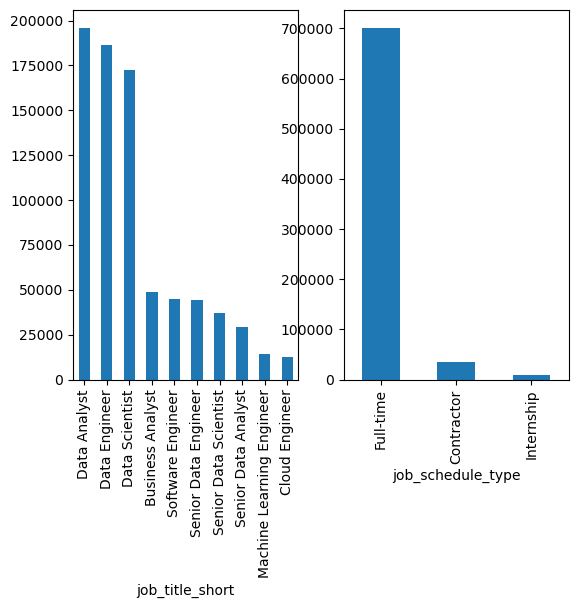

In [ ]:
# now we are going to plot both the job_title_short and the job_schedule_type on the same plot separately.
fig, ax = plt.subplots(1, 2)  # 1 and 2 stand for the number of rows and columns

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0]) #the 0 is the index/position of the ax 
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar', ax=ax[1])

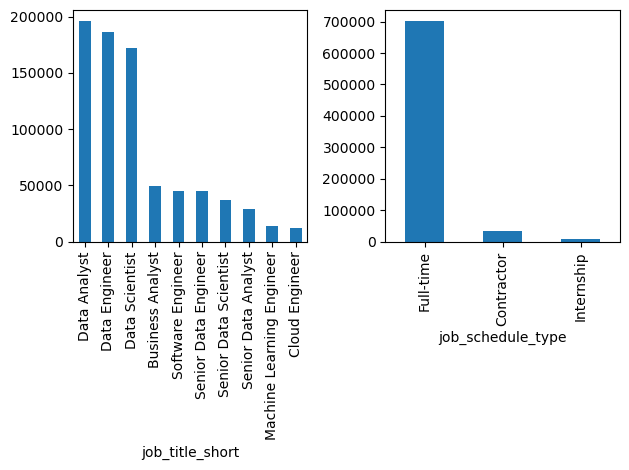

In [11]:
# in the above figure, there is an overlap of the y axis numbers on the other plot. This can be fixed with the function called tight layout.
# this function is to be applied to the entire figure.

fig, ax = plt.subplots(1, 2)  # 1 and 2 stand for the number of rows and columns

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])  
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar', ax=ax[1])

fig.tight_layout()


Earlier, for all the plots that we made above, we used Pandas for plotting. Now we are going to make the same plot using Matplotlib

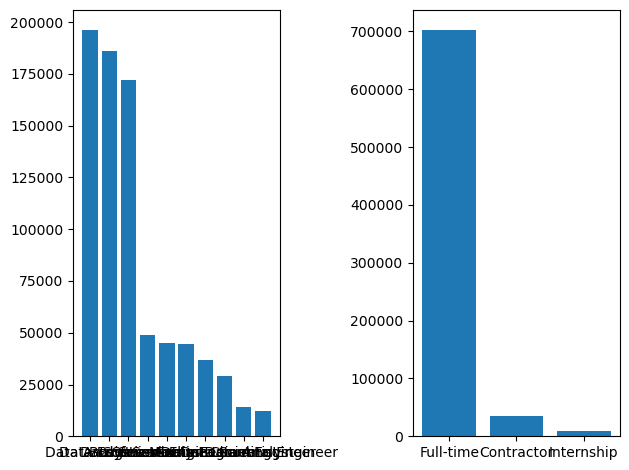

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
# the reason why the 'df['job_title_short'].value_counts()' part is repeating is because that's first written for the x asis, then the y axis.
# so it goes like: x, y
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()
plt.show()

As seen above, Matplotlib requires writing longer lines of code than Pandas. It's more verbose basically.

## Example - Counts of Top Skills in Job Postings

In [16]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

job_skills            job_title_short  skill_count
1480      python             Data Scientist       113711
1822         sql              Data Engineer       113130
1479      python              Data Engineer       108022
1821         sql               Data Analyst        92428
1823         sql             Data Scientist        78982
...          ...                        ...          ...
2173       webex      Senior Data Scientist            1
293   codecommit           Business Analyst            1
2233     xamarin  Machine Learning Engineer            1
1087         mlr  Machine Learning Engineer            1
1093  monday.com  Machine Learning Engineer            1

[2256 rows x 3 columns]

In [24]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
# we created a list bec we have to loop thru each item in this list and get it's related info from the table in order to plot it.

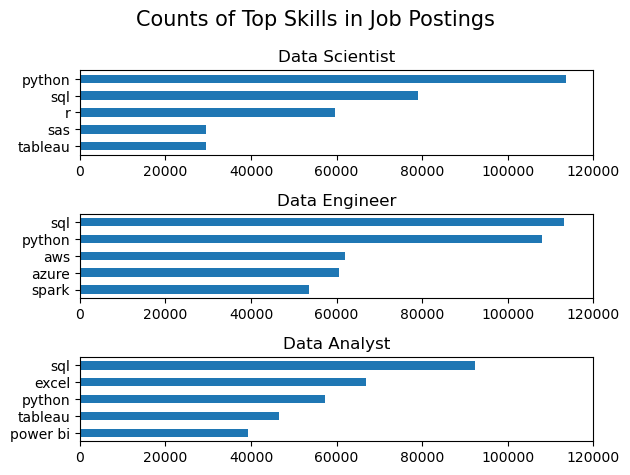

In [33]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)
    
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()